In [1]:
import pandas as pd


# Data Cleaning
TODO Add data cleaning

In [2]:
df = pd.read_csv('winequality-red.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Univariate Analysis

## Statistical Analysis
- Mean
- Median
- Mode
- Range
- Variance
- Standard Deviation


Here is the formula for standard deviation with a description:

$$
\sigma = \sqrt{\frac{\sum_{i=1}^{n}(x_i - \mu)^2}{n}}
$$

where $\sigma$ is the standard deviation, $x_i$ is the $i^{th}$ data point, $\mu$ is the mean, and $n$ is the number of data points.


In [5]:
import math
col = df['fixed acidity']

#The summation inside the formula
summation_col = col.apply(lambda x: (x-col.mean())**2).sum()

#Calculate for stdev
stdev = math.sqrt(summation_col/len(col))
stdev

1.7405518001102729

In [6]:
def calc_standard_dev(col):

    #The summation inside the formula
    summation_col = col.apply(lambda x: (x-col.mean())**2).sum()

    #Calculate for stdev
    stdev = math.sqrt(summation_col/len(col))
    return stdev

In [7]:
df.apply(lambda x:calc_standard_dev(x))

fixed acidity            1.740552
volatile acidity         0.179004
citric acid              0.194740
residual sugar           1.409487
chlorides                0.047051
free sulfur dioxide     10.456886
total sulfur dioxide    32.885037
density                  0.001887
pH                       0.154338
sulphates                0.169454
alcohol                  1.065334
quality                  0.807317
dtype: float64

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Frequency Distribution

In [9]:
df.quality.plot(kind='hist',backend='plotly')

<AxesSubplot:>

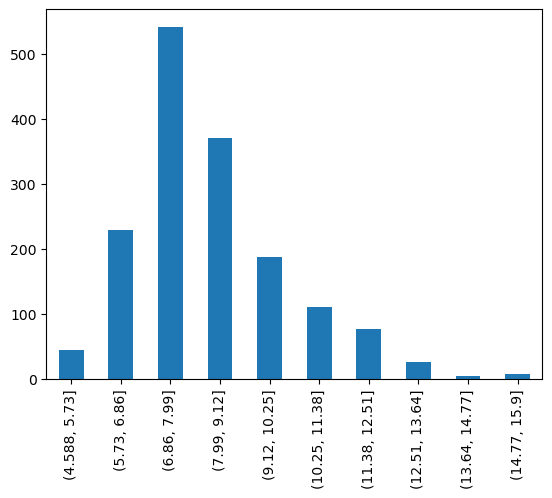

In [10]:
#Binning
bin = pd.cut(df['fixed acidity'],bins=10,include_lowest=True)
#You can also change the bin to list of values check pandas documentation for more information https://pandas.pydata.org/docs/reference/api/pandas.cut.html
bin.value_counts(sort=False).plot(kind='bar')

## Outlier Detection

### IQR

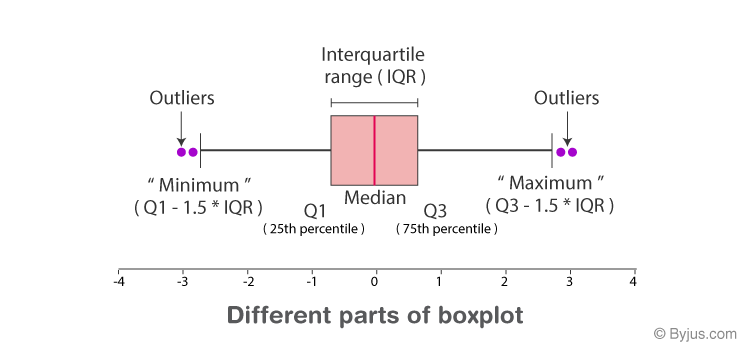

<AxesSubplot:>

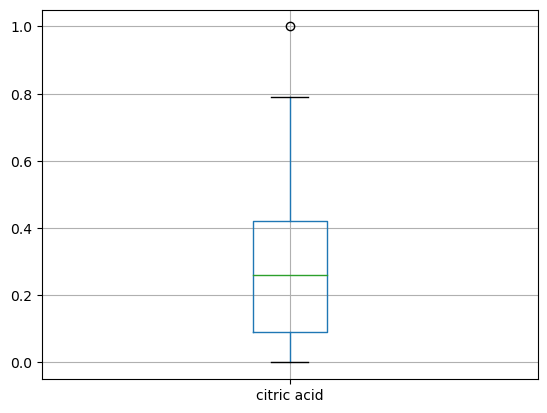

In [11]:
df.boxplot(column=['citric acid'])

In [12]:
quantile1 = df['citric acid'].quantile(0.25)
quantile3 = df['citric acid'].quantile(0.75)
IQR = quantile3 - quantile1
IQR

0.32999999999999996

In [13]:
lower_bound = quantile1 - 1.5*IQR
upper_bound = quantile3 + 1.5*IQR
df['citric acid'][(df['citric acid'] > lower_bound) & (df['citric acid'] < upper_bound)]

0       0.00
1       0.00
2       0.04
3       0.56
4       0.00
        ... 
1594    0.08
1595    0.10
1596    0.13
1597    0.12
1598    0.47
Name: citric acid, Length: 1598, dtype: float64

In [14]:
def calc_iqr(col):
    quantile1 = col.quantile(0.25)
    quantile3 = col.quantile(0.75)
    IQR = quantile3 - quantile1
    lower_bound = quantile1 - 1.5*IQR
    upper_bound = quantile3 + 1.5*IQR
    filtered_col = col[(col > lower_bound) & (col < upper_bound)]
    return filtered_col

In [15]:
df.apply(lambda x: calc_iqr(x))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


### ZScore Method

$$
Z = \frac{x - \mu}{\sigma}
$$

- x is a value from the data
- μ (mu) is the mean of the data
- σ (sigma) is the standard deviation of the data
- Z is the Z-score, which represents the number of standard deviations x is from the mean μ.

In [16]:
from utils import filter_by_zscore
from utils import filter_by_stdev

In [17]:
zthresh = 3 #Any int
stdev_mul = 2 #Any int
df.apply(lambda x: filter_by_stdev (x,stdev_mul))
df.apply(lambda x: filter_by_zscore(x,zthresh))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [18]:
#Exercise

# Multivariate Analysis 

## Correlation
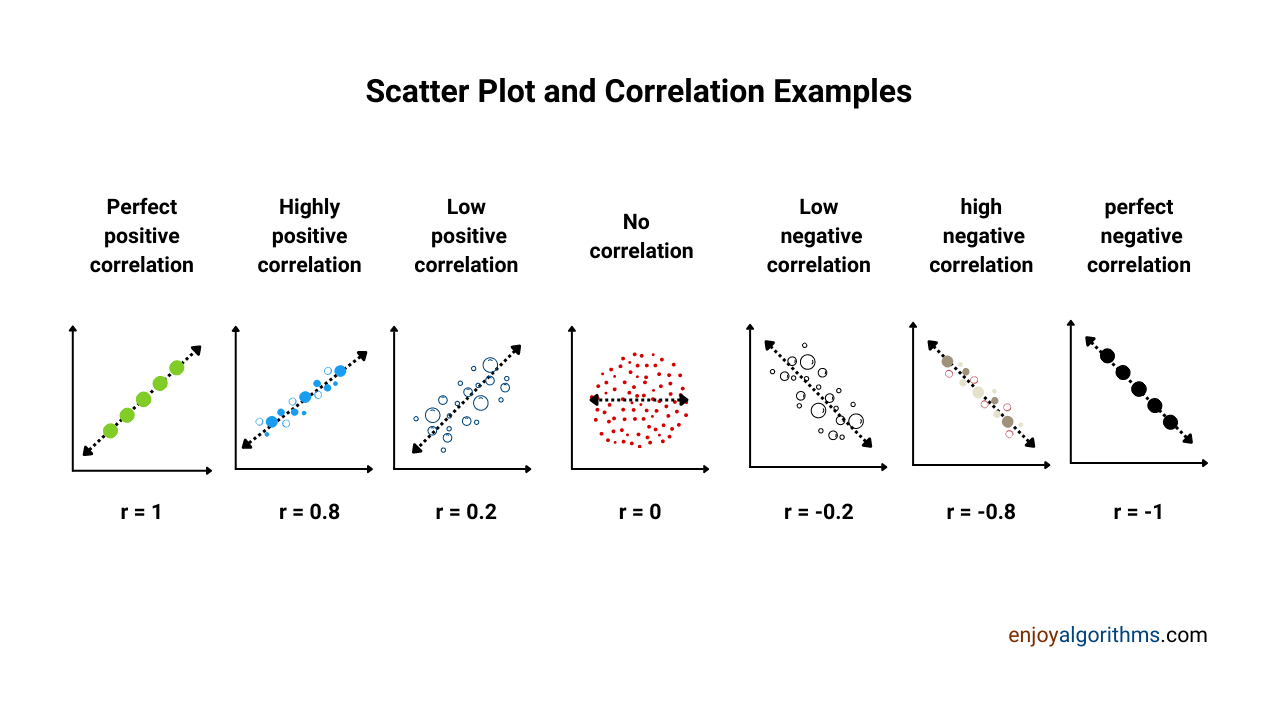

$$
\rho_{x,y} = \frac{\sum\limits_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum\limits_{i=1}^{n}(x_i - \bar{x})^2} \sqrt{\sum\limits_{i=1}^{n}(y_i - \bar{y})^2}}

$$


In [19]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


## Scatter plot

In [21]:
import plotly.express as px

In [22]:
fig = px.scatter(df, x="pH", y="fixed acidity",color='quality')
fig.show()

In [23]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig.show()

## Pairplot

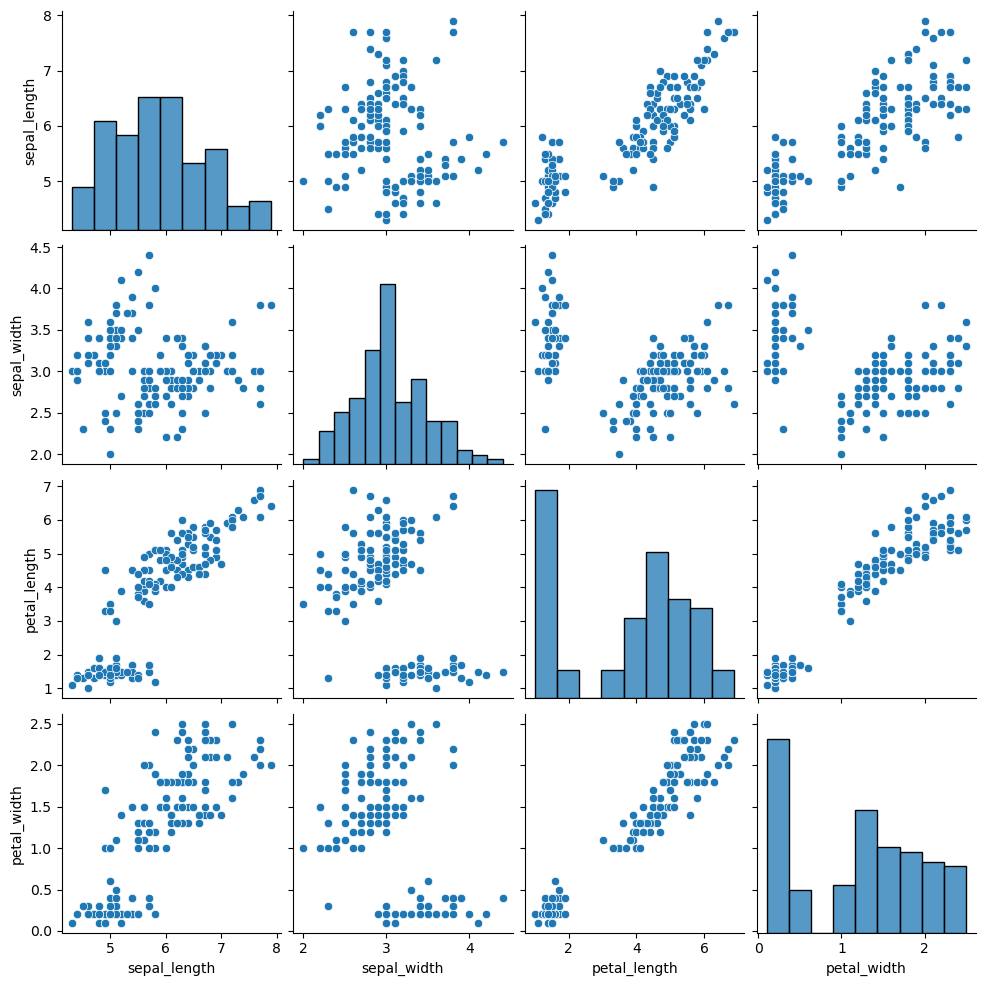

In [24]:
sns.pairplot(df[list(df.columns)[:-2]])